In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

races = pd.read_csv('data/races.csv')
runs = pd.read_csv('data/runs.csv')

# Exploratory Analysis

How many horses have been observed enough to get accurate estimations?

In [3]:
derby_winners = {
    1875: "Aristides",
    1876: "Vagrant",
    1877: "Baden-Baden",
    1878: "Day Star",
    1879: "Lord Murphy",
    1880: "Fonso",
    1881: "Hindoo",
    1882: "Apollo",
    1883: "Buchanan",
    1884: "Leonatus",
    1885: "Joe Cotton",
    1886: "Ben Ali",
    1887: "Montrose",
    1888: "MacBeth II",
    1889: "Spokane",
    1890: "Riley",
    1891: "Kingman",
    1892: "Azra",
    1893: "Lookout",
    1894: "Chant",
    1895: "Halma",
    1896: "Ben Brush",
    1897: "Typhoon II",
    1898: "Plaudit",
    1899: "Manuel",
    1900: "Lieut. Gibson",
    1901: "His Eminence",
    1902: "Alan-a-Dale",
    1903: "Judge Himes",
    1904: "Elwood",
    1905: "Agile",
    1906: "Sir Huon",
    1907: "Pink Star",
    1908: "Stone Street",
    1909: "Wintergreen",
    1910: "Donau",
    1911: "Meridian",
    1912: "Worth",
    1913: "Donerail",
    1914: "Old Rosebud",
    1915: "Regret",
    1916: "George Smith",
    1917: "Omar Khayyam",
    1918: "Exterminator",
    1919: "Sir Barton",
    1920: "Paul Jones",
    1921: "Behave Yourself",
    1922: "Morvich",
    1923: "Zev",
    1924: "Black Gold",
    1925: "Flying Ebony",
    1926: "Bubbling Over",
    1927: "Whiskery",
    1928: "Reigh Count",
    1929: "Clyde Van Dusen",
    1930: "Gallant Fox",
    1931: "Twenty Grand",
    1932: "Burgoo King",
    1933: "Brokers Tip",
    1934: "Cavalcade",
    1935: "Omaha",
    1936: "Bold Venture",
    1937: "War Admiral",
    1938: "Lawrin",
    1939: "Johnstown",
    1940: "Gallahadion",
    1941: "Whirlaway",
    1942: "Shut Out",
    1943: "Count Fleet",
    1944: "Pensive",
    1945: "Hoop Jr.",
    1946: "Assault",
    1947: "Jet Pilot",
    1948: "Citation",
    1949: "Ponder",
    1950: "Middleground",
    1951: "Count Turf",
    1952: "Hill Gail",
    1953: "Dark Star",
    1954: "Determine",
    1955: "Swaps",
    1956: "Needles",
    1957: "Iron Liege",
    1958: "Tim Tam",
    1959: "Tomy Lee",
    1960: "Venetian Way",
    1961: "Carry Back",
    1962: "Decidedly",
    1963: "Chateaugay",
    1964: "Northern Dancer",
    1965: "Lucky Debonair",
    1966: "Kauai King",
    1967: "Proud Clarion",
    1968: "Forward Pass",
    1969: "Majestic Prince",
    1970: "Dust Commander",
    1971: "Canonero II",
    1972: "Riva Ridge",
    1973: "Secretariat",
    1974: "Cannonade",
    1975: "Foolish Pleasure",
    1976: "Bold Forbes",
    1977: "Seattle Slew",
    1978: "Affirmed",
    1979: "Spectacular Bid",
    1980: "Genuine Risk",
    1981: "Pleasant Colony",
    1982: "Gato Del Sol",
    1983: "Sunny's Halo",
    1984: "Swale",
    1985: "Spending a Buck",
    1986: "Ferdinand",
    1987: "Alysheba",
    1988: "Winning Colors",
    1989: "Sunday Silence",
    1990: "Unbridled",
    1991: "Strike the Gold",
    1992: "Lil E. Tee",
    1993: "Sea Hero",
    1994: "Go for Gin",
    1995: "Thunder Gulch",
    1996: "Grindstone",
    1997: "Silver Charm",
    1998: "Real Quiet",
    1999: "Charismatic",
    2000: "Fusaichi Pegasus",
    2001: "Monarchos",
    2002: "War Emblem",
    2003: "Funny Cide",
    2004: "Smarty Jones",
    2005: "Giacomo",
    2006: "Barbaro",
     2007: "Street Sense",
    2008: "Big Brown",
    2009: "Mine That Bird",
    2010: "Super Saver",
    2011: "Animal Kingdom",
    2012: "I'll Have Another",
    2013: "Orb",
    2014: "California Chrome",
    2015: "American Pharoah",
    2016: "Nyquist",
    2017: "Always Dreaming",
    2018: "Justify",
    2019: "Country House",
    2020: "Authentic",
    2021: "Medina Spirit"
}


with open('horse_names.txt','w') as f:
    for name in derby_winners.values():
        f.write(name +'\n')
    f.close()

In [4]:
sum(runs['horse_id'].value_counts() >= 30)

947

In [5]:
runs.columns

Index(['race_id', 'horse_no', 'horse_id', 'result', 'won', 'lengths_behind',
       'horse_age', 'horse_country', 'horse_type', 'horse_rating',
       'horse_gear', 'declared_weight', 'actual_weight', 'draw',
       'position_sec1', 'position_sec2', 'position_sec3', 'position_sec4',
       'position_sec5', 'position_sec6', 'behind_sec1', 'behind_sec2',
       'behind_sec3', 'behind_sec4', 'behind_sec5', 'behind_sec6', 'time1',
       'time2', 'time3', 'time4', 'time5', 'time6', 'finish_time', 'win_odds',
       'place_odds', 'trainer_id', 'jockey_id'],
      dtype='object')

In [6]:
races

,race_id,date,venue,race_no,config,surface,distance,going,horse_ratings,prize,...,place_combination3,place_combination4,place_dividend1,place_dividend2,place_dividend3,place_dividend4,win_combination1,win_dividend1,win_combination2,win_dividend2
0,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0,...,6.0,NaN,36.5,25.5,18.0,NaN,8,121.0,NaN,NaN
1,1,1997-06-02,ST,2,A,0,1200,GOOD TO FIRM,40-15,485000.0,...,4.0,NaN,12.5,47.0,33.5,NaN,5,23.5,NaN,NaN
2,2,1997-06-02,ST,3,A,0,1400,GOOD TO FIRM,60-40,625000.0,...,13.0,NaN,23.0,23.0,59.5,NaN,11,70.0,NaN,NaN
3,3,1997-06-02,ST,4,A,0,1200,GOOD TO FIRM,120-95,1750000.0,...,10.0,NaN,14.0,24.5,16.0,NaN,5,52.0,NaN,NaN
4,4,1997-06-02,ST,5,A,0,1600,GOOD TO FIRM,60-40,625000.0,...,1.0,NaN,15.5,28.0,17.5,NaN,2,36.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6344,6344,2005-08-28,ST,6,A,0,1400,GOOD,115-95,2500000.0,...,5.0,NaN,13.5,14.5,62.5,NaN,6,38.0,NaN,NaN
6345,6345,2005-08-28,ST,7,A,0,1600,GOOD,G,23000000.0,...,14.0,NaN,18.0,20.5,45.0,NaN,5,60.0,NaN,NaN
6346,6346,2005-08-28,ST,8,A,0,2000,GOOD,G,25000000.0,...,5.0,NaN,11.0,27.5,38.5,NaN,2,17.5,NaN,NaN
6347,6347,2005-08-28,ST,9,A,0,1200,GOOD,100-80,1750000.0,...,4.0,NaN,11.0,37.0,21.5,NaN,9,16.0,NaN,NaN


In [7]:
races.columns

Index(['race_id', 'date', 'venue', 'race_no', 'config', 'surface', 'distance',
       'going', 'horse_ratings', 'prize', 'race_class', 'sec_time1',
       'sec_time2', 'sec_time3', 'sec_time4', 'sec_time5', 'sec_time6',
       'sec_time7', 'time1', 'time2', 'time3', 'time4', 'time5', 'time6',
       'time7', 'place_combination1', 'place_combination2',
       'place_combination3', 'place_combination4', 'place_dividend1',
       'place_dividend2', 'place_dividend3', 'place_dividend4',
       'win_combination1', 'win_dividend1', 'win_combination2',
       'win_dividend2'],
      dtype='object')

What are the different distances? 

In [8]:
races['distance'].value_counts()

1200    2017
1650    1095
1400    1081
1000     698
1600     637
1800     589
2000     117
2200      90
2400      25
Name: distance, dtype: int64

In [9]:
races[races['distance'] == 1000]

,race_id,date,venue,race_no,config,surface,distance,going,horse_ratings,prize,...,place_combination3,place_combination4,place_dividend1,place_dividend2,place_dividend3,place_dividend4,win_combination1,win_dividend1,win_combination2,win_dividend2
7,7,1997-06-02,ST,8,A,0,1000,GOOD TO FIRM,100-80,1150000.0,...,8.0,NaN,23.5,44.5,18.0,NaN,13,70.5,NaN,NaN
13,13,1997-06-04,HV,4,A,0,1000,GOOD TO FIRM,60-40,625000.0,...,8.0,NaN,17.5,10.1,17.5,NaN,1,70.0,NaN,NaN
15,15,1997-06-04,HV,6,A,0,1000,GOOD TO FIRM,80-60,850000.0,...,4.0,NaN,20.0,80.0,42.5,NaN,8,66.0,NaN,NaN
18,18,1997-06-08,ST,1,A+3,0,1000,GOOD TO FIRM,60-40,625000.0,...,1.0,NaN,40.0,13.0,34.5,NaN,3,141.0,NaN,NaN
20,20,1997-06-08,ST,3,A+3,0,1000,GOOD TO FIRM,80-60,850000.0,...,3.0,NaN,35.5,38.0,38.5,NaN,9,181.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6293,6293,2005-08-10,HV,1,C+3,0,1000,GOOD TO YIELDING,40-15,630000.0,...,4.0,NaN,48.0,18.5,97.5,NaN,5,153.0,NaN,NaN
6303,6303,2005-08-14,ST,3,C,0,1000,GOOD,60-40,840000.0,...,8.0,NaN,14.0,14.0,35.0,NaN,11,41.0,NaN,NaN
6325,6325,2005-08-21,ST,6,C+3,0,1000,GOOD TO FIRM,80-60,1235000.0,...,1.0,NaN,14.0,35.0,16.0,NaN,14,31.5,NaN,NaN
6331,6331,2005-08-24,HV,2,B,0,1000,GOOD TO FIRM,85-60,1235000.0,...,8.0,NaN,17.5,194.5,39.5,NaN,1,64.0,NaN,NaN


In [10]:
#sorted(runs['time3'], reverse=True)

Ideas:
Look at horses with >= 30 observations. 
Find specifics ways to describe a horse:
- Top Speed
- Consistency
- Endurance
- Jockey Ability?  (maybe)

Columns I should keep for now:

-**Races:**
race_id, surface, distance, going

-**Runs:**
race_id, horse_id, draw, time1-6, finish_time, win_odds, place_odds, trainer_id, jockey_id

In [11]:
run_reduced = runs[['race_id', 'horse_no', 'time1', 'time2', 'time3', 'time4', 'time5', 'time6', 'finish_time']]

In [12]:
runs

,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,horse_rating,...,time2,time3,time4,time5,time6,finish_time,win_odds,place_odds,trainer_id,jockey_id
0,0,1,3917,10,0.0,8.00,3,AUS,Gelding,60,...,21.59,23.86,24.62,NaN,NaN,83.92,9.7,3.7,118,2
1,0,2,2157,8,0.0,5.75,3,NZ,Gelding,60,...,21.99,23.30,23.70,NaN,NaN,83.56,16.0,4.9,164,57
2,0,3,858,7,0.0,4.75,3,NZ,Gelding,60,...,21.59,23.90,24.22,NaN,NaN,83.40,3.5,1.5,137,18
3,0,4,1853,9,0.0,6.25,3,SAF,Gelding,60,...,21.83,23.70,24.00,NaN,NaN,83.62,39.0,11.0,80,59
4,0,5,2796,6,0.0,3.75,3,GB,Gelding,60,...,21.75,23.22,23.50,NaN,NaN,83.24,50.0,14.0,9,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79442,6348,10,1238,6,0.0,1.25,5,AUS,Gelding,87,...,23.98,23.53,22.52,NaN,NaN,96.17,99.0,NaN,73,40
79443,6348,11,985,7,0.0,2.25,5,NZ,Gelding,84,...,24.10,23.77,22.61,NaN,NaN,96.30,99.0,NaN,164,63
79444,6348,12,3147,10,0.0,3.00,5,NZ,Gelding,83,...,24.06,23.37,22.43,NaN,NaN,96.44,99.0,NaN,111,68
79445,6348,13,1982,8,0.0,2.50,3,AUS,Gelding,82,...,24.02,23.45,22.29,NaN,NaN,96.34,4.6,NaN,118,95


In [13]:
races_reduced = races[['race_id', 'surface', 'distance', 'going']]

In [14]:
run_reduced.shape

(79447, 9)

In [16]:
merged = run_reduced.merge(races_reduced,'inner',on='race_id')
merged[merged.distance == 1000].sort_values('finish_time')

,race_id,horse_no,time1,time2,time3,time4,time5,time6,finish_time,surface,distance,going
72205,5768,1,13.42,20.36,21.38,NaN,NaN,NaN,55.16,0,1000,GOOD
72206,5768,2,13.30,20.28,21.59,NaN,NaN,NaN,55.17,0,1000,GOOD
72207,5768,3,12.98,20.36,21.88,NaN,NaN,NaN,55.22,0,1000,GOOD
72209,5768,5,13.14,20.40,21.81,NaN,NaN,NaN,55.35,0,1000,GOOD
13536,1078,1,13.69,20.68,21.00,NaN,NaN,NaN,55.37,0,1000,GOOD
...,...,...,...,...,...,...,...,...,...,...,...,...
607,49,10,17.22,22.47,24.62,NaN,NaN,NaN,64.31,0,1000,GOOD TO FIRM
21646,1727,12,15.80,23.49,25.41,NaN,NaN,NaN,64.70,0,1000,GOOD
47477,3791,4,13.13,22.27,29.86,NaN,NaN,NaN,65.26,0,1000,GOOD TO FIRM
69785,5576,13,13.41,21.07,31.01,NaN,NaN,NaN,65.49,0,1000,GOOD


In [14]:
merged

,race_id,horse_no,time1,time2,time3,time4,time5,time6,surface,distance,going
0,0,1,13.85,21.59,23.86,24.62,NaN,NaN,0,1400,GOOD TO FIRM
1,0,2,14.57,21.99,23.30,23.70,NaN,NaN,0,1400,GOOD TO FIRM
2,0,3,13.69,21.59,23.90,24.22,NaN,NaN,0,1400,GOOD TO FIRM
3,0,4,14.09,21.83,23.70,24.00,NaN,NaN,0,1400,GOOD TO FIRM
4,0,5,14.77,21.75,23.22,23.50,NaN,NaN,0,1400,GOOD TO FIRM
...,...,...,...,...,...,...,...,...,...,...,...
79442,6348,10,26.14,23.98,23.53,22.52,NaN,NaN,0,1600,GOOD
79443,6348,11,25.82,24.10,23.77,22.61,NaN,NaN,0,1600,GOOD
79444,6348,12,26.58,24.06,23.37,22.43,NaN,NaN,0,1600,GOOD
79445,6348,13,26.58,24.02,23.45,22.29,NaN,NaN,0,1600,GOOD


Can times be modeled by a normal distribution?

In [16]:
merged_1200 = merged[merged['distance'] == 1200]
times = merged_1200['time1']

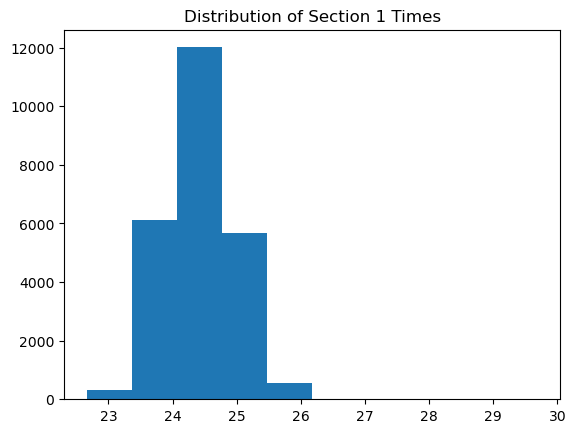

In [17]:
plt.hist(times)
plt.title('Distribution of Section 1 Times')
plt.show()

In [81]:
np.mean(times)

24.4200834109406

In [82]:
np.std(times)

0.518503708577024

In [77]:
dist = np.random.normal(loc=24.42, scale=0.5185, size=len(merged_1200))

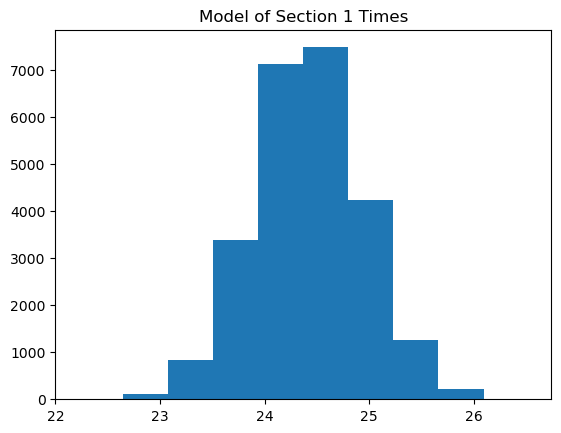

In [85]:
plt.hist(dist)
plt.title('Model of Section 1 Times')
plt.show()

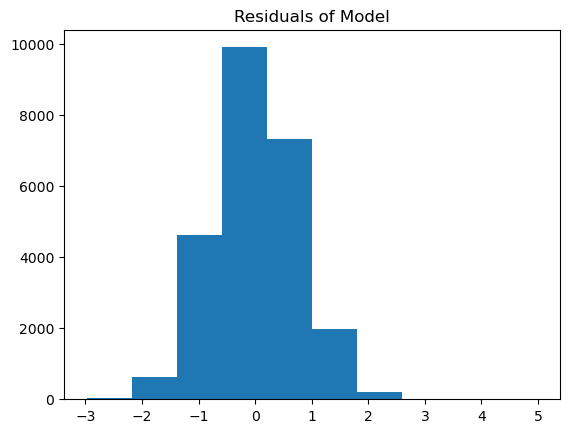

In [86]:
plt.hist(times-dist)
plt.title('Residuals of Model')
plt.show()

As expected the residuals are distributed normally with mean 0, so a normal distribution works well for modeling times.

**The idea with this in mind:**

- Classify horses by their top speed into a ratings scale (e.g. 1-8)
- For each rating of horses, the distribution of their speeds will be modeled by a normal distribution
- Allow users to select a top speed rating from 1-8
- Randomly sample their horse's top speed from distribution accordingly

**Idea for segmenting horses into ratings**

To get top speed:
- For each horse take the average of their top 3 section 3 times (section 3 is the only one with consistent distance of 400m)
- Take the mean and standard deviation of all horses averages
- Create a normal distribution to model the top speed times
- Ratings will be given 1-8 according to the 8 sections created by cutoffs at the first +/- 3 standard deviations
    - i.e one section will be between the mean and 1 sd below the mean, another will be between 2 sd below and 1 sd below, etc.
    - (Look up bell curve with sections for visual aid)
- To decide the horse's speed, randomly sample from a modeled distribution of horses with the given rating

To get consistency:

- For each horse get the variance of their speeds
- Take mean and standard deviation of all horses variances
- Create 1-8 rating scale using same method as above
- Randomly sample from model distribution to get the horse's consistency

To get endurance:

- For each horse subtract average time of 1st half of race from avg 2nd half time
- Same process as above from there
- Endurance will determine if a horse is a front-runner or a closer

### Putting it together into a Final Product

I want to create a horse racing simulator where each horse has 3 ratings: Top Speed, Endurance, Consistency. 

**Pre-race:**
- Either randomly generate horses ratings, or manually choose ratings for each horse
- The distributions that each horse will randomly sample from will be determined based on ratings

**Race:**
- The race will be determined by a random walk (with time steps and step lengths)
- At each time step a horses step length will be determined by randomly sampling from a normal distribution
    - The mean of the distribution will be determined by top speed rating
    - The variance will be determined by consistency rating
    - Endurance rating will cause decreases in the mean of the distribution throughout the race
        - Horses with high endurance may start slow and finish fast, vice versa
        - Jockey ability could possibly be incorporated to determine the timing (i.e. with a good jockey, maybe a horse with high endurance picks up the speed earlier)

**Ideal Interface:**
- An eliptical track
- Horses move around the track according to time steps and their step lengths

## Workflow:

- Before the race the user specifies the amount of horses, their ratings, the distance of the race, etc.
- Database is queried to preprocess data
    - Standard deviation cutoff values are obtained for the 8 sections of each attribute
    - A query is made based on these cut off values to get each the necessary distributions to be sampled from
    - Each horse is given there attribute values (characteristic of class object)

## TODO
- Clean the data
- Create a query that gets standard deviation and mean of time3 in database
- Use the std and mean to give horses ratings
- Based on user entry get necessary values